In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [14]:
from sklearn.utils import shuffle

In [31]:
#utworze teraz dane jakies
def kolko_w_kolku(sig1=0.4,sig2=0.6,R2=1.,N=1000):
    """to ma utworzyc dane ktore posluza mi do sprawdzenia czy i jak dziala model"""
    features=[]
    labels=[]
    for i in range(N):
        x=np.random.normal(0,sig1)
        y=np.random.normal(0,sig1)
        features.append([x,y])
        labels.append(0)
    for i in range(N):
        alpha=np.random.uniform()*2*np.pi
        delr=np.random.normal(0,sig2)
        r=R2+delr
        x=np.cos(alpha)*r
        y=np.sin(alpha)*r
        features.append([x,y])
        labels.append(1)
    features=np.array(features)
    labels=np.array(labels)
    features,labels=shuffle(features,labels)
    return features,labels

In [32]:
def rysoj_dane(f,l):
    plt.clf()
    plt.scatter(f[:,0],f[:,1],c=l,s=5)

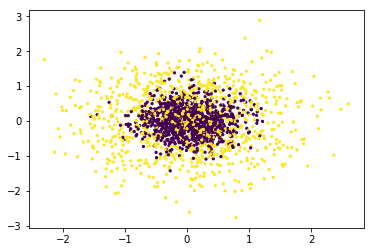

In [33]:
f,l=kolko_w_kolku()
rysoj_dane(f,l)

In [34]:
#teraz sproboje z tego zrobic jakis dataset

In [ ]:
f,l=kolko_w_kolku()

In [52]:
dataset = tf.data.Dataset.from_tensor_slices((f,l))

In [65]:
BATCH_SIZE=100
zbachowany=dataset.shuffle(1000).repeat().batch(BATCH_SIZE)

In [66]:
#to jest dataset zaraz zastanowie sie jak go zapisac do pliku i z tego pliku odczytac a teraz jak go czytac?

In [67]:
iterator = zbachowany.make_one_shot_iterator()

In [68]:
f,l=iterator.get_next()

In [71]:
with tf.Session() as sess:
    for i in range(100):
        sess.run(l)
    

In [ ]:
def tworz_dataset(file_name):
    """tworzy plik tensorflowowoy"""
    writer = tf.python_io.TFRecordWriter(val_filename)
    